# PCA

Most of us will get stuck when there is a sea of variables to analyse and it is difficult to decide which features to choose so that your model is safe from overfitting. To reduce the dimension of the feature space we normally use PCA.

Here our objective is to classify patients into malignant or benign groups based on the data we have. But here the data set contains around 30 variables. So first we need to reduce the dimensionality and then do classification.

For this we’ll be using the Breast Cancer Wisconsin data set from the UCI Machine learning repo as our data.

https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names

In [1]:
#Importing libraries
import pandas as pd
import numpy as np

In [2]:
#importing the breast cancer dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
#See head of the dataset
data = pd.DataFrame(cancer.data)
data.head()

0      1       2       3        4        5       6        7       8   \
0  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001  0.14710  0.2419   
1  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869  0.07017  0.1812   
2  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974  0.12790  0.2069   
3  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414  0.10520  0.2597   
4  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980  0.10430  0.1809   

        9    ...        20     21      22      23      24      25      26  \
0  0.07871   ...     25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119   
1  0.05667   ...     24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416   
2  0.05999   ...     23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504   
3  0.09744   ...     14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869   
4  0.05883   ...     22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000   

       27      28       29  
0  0.2654  0.4601  0.11890  
1  0.1860  0.2750  0.08902  
2  0.2430  0.3613  0.08758  
3  0.2575  0.6638  0.17300  
4  0.1625  0.2364  0.07678  

[5 rows x 30 columns]

In [4]:
#Adding the feature names to the dataframe
data.columns = cancer.feature_names
data.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension           ...             worst radius  \
0                 0.07871           ...                    25.38   
1                 0.05667           ...                    24.99   
2                 0.05999           ...                    23.57   
3                 0.09744           ...                    14.91   
4                 0.05883           ...                    22.54   

   worst texture  worst perimeter  worst area  worst smoothness  \
0          17.33           184.60      2019.0            0.1622   
1          23.41           158.80      1956.0            0.1238   
2          25.53           152.50      1709.0            0.1444   
3          26.50            98.87       567.7            0.2098   
4          16.67           152.20      1575.0            0.1374   

   worst compactness  worst concavity  worst concave points  worst symmetry  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   worst fractal dimension  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678  

[5 rows x 30 columns]

In [5]:
#Adding target variable to dataframe
data['Target'] = cancer.target

In [6]:
#See the shape of dataset
data.shape

(569, 31)

In [7]:
#Checking ditribution of target variable
data.Target.value_counts()

1    357
0    212
Name: Target, dtype: int64

In [8]:
#Check for missing values
data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
Target                     0
dtype: int64

In [9]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
features = np.arange(0,31)
# Separating out the features
x =  data.drop(['Target'],axis=1)
# Separating out the target
y =  data[['Target']].values
# Standardizing the features
X_std  = StandardScaler().fit_transform(x)

#### PCA

In [10]:
###Find optimum value for number of principal components

In [11]:
#PCA with maximum number of components
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(X_std)

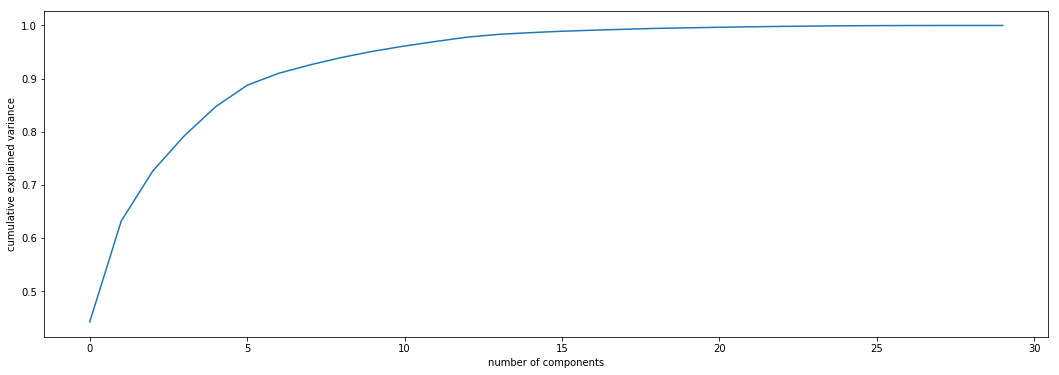

In [13]:
#Checking the variance explained by different components
import matplotlib.pyplot as plt
f,ax = plt.subplots(figsize=(18, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

From the plot we can observe that by using about 10 components more than 90% of the variation can be explained

In [14]:
#PCA
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(x)
X = pd.DataFrame(data = principalComponents)

In [15]:
#combine the new features and target variable
finalDf = pd.concat([X, data[['Target']]], axis = 1)

In [16]:
finalDf.head()

0           1          2          3          4         5  \
0  1160.142574 -293.917544  48.578398  -8.711975  32.000486  1.265415   
1  1269.122443   15.630182 -35.394534  17.861283  -4.334874 -0.225872   
2   995.793889   39.156743  -1.709753   4.199340  -0.466529 -2.652811   
3  -407.180803  -67.380320   8.672848 -11.759867   7.115461  1.299436   
4   930.341180  189.340742   1.374801   8.499183   7.613289  1.021160   

          6         7         8         9  Target  
0  0.931337  0.148167  0.745463  0.589359       0  
1 -0.046037  0.200804 -0.485828 -0.084035       0  
2 -0.779745 -0.274026 -0.173874 -0.186994       0  
3 -1.267304 -0.060555 -0.330639 -0.144155       0  
4 -0.335522  0.289109  0.036087 -0.138502       0

# Logistic Regression

In [17]:
#Spliting target variable and independent variables
x =  finalDf.drop(['Target'],axis=1)
# Separating out the target
y =  finalDf['Target']

In [18]:
#Splitting to training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4, stratify=y)

#### Training logistic regression model

In [19]:
# import library for LogisticRegression
from sklearn.linear_model import LogisticRegression

#Create a Logistic regression classifier
logreg = LogisticRegression()

# Train the model using the training sets 
logreg.fit(X_train, y_train)

C:\Users\Tejas.gowda\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

#### Model Evaluation

In [20]:
# Prediction on train data
y_pred = logreg.predict(X_train)

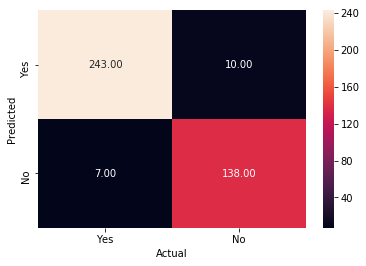

In [21]:
#Create confusion matrix to find out Sensitivity and specificity
import seaborn as sn
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import auc,confusion_matrix
import matplotlib.pyplot as plt
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted, [1,0]).T
    sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Yes","No"] , yticklabels = ["Yes","No"] )
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    plt.show()
draw_cm(y_train, y_pred)

In [22]:
from sklearn import metrics
import numpy as np
print( 'Total Accuracy : ',np.round( metrics.accuracy_score(y_train, y_pred), 2 ) )
print( 'Precision : ',np.round( metrics.precision_score(y_train, y_pred), 2 ) )
print( 'Recall : ',np.round( metrics.recall_score(y_train, y_pred), 2 ) )

Total Accuracy :  0.96
Precision :  0.96
Recall :  0.97


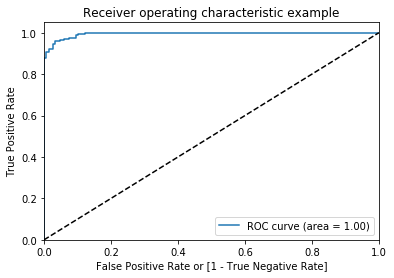

In [23]:
#AUC
import matplotlib.pyplot as plt
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

fpr, tpr, thresholds = draw_roc(y_train, logreg.predict_proba(X_train)[:,1])

#### For test data

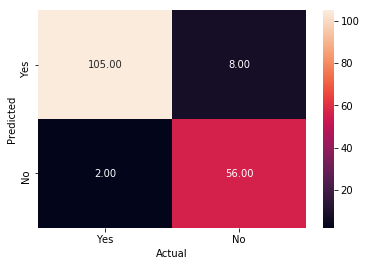

In [24]:
# Prediction on test data
y_pred_test = logreg.predict(X_test)

#Confusion metrix
draw_cm(y_test, y_pred_test)

In [25]:
print( 'Total Accuracy : ',np.round( metrics.accuracy_score(y_test, y_pred_test ), 2 ) )
print( 'Precision : ',np.round( metrics.precision_score(y_test, y_pred_test), 2 ) )
print( 'Recall : ',np.round( metrics.recall_score(y_test, y_pred_test), 2 ) )

Total Accuracy :  0.94
Precision :  0.93
Recall :  0.98


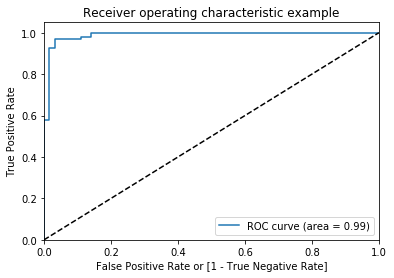

In [26]:
#AUC
fpr, tpr, thresholds = draw_roc(y_test, logreg.predict_proba(X_test)[:,1])